In [1]:
# package used
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
from normal_estimator import normal_Est


using device: CUDA


In [2]:
nest = normal_Est()
nest.parameter_init()
input_file_name = "dragon"
figure_path = "evaluate_figures_plot"

loading the model
Creating optimizer
Training


100%|████████████| 391/391 [00:19<00:00, 20.06it/s, Bloss=3.96e-5, loss=2.67e-5]


training finished


100%|██████████| 462/462 [00:22<00:00, 20.79it/s]


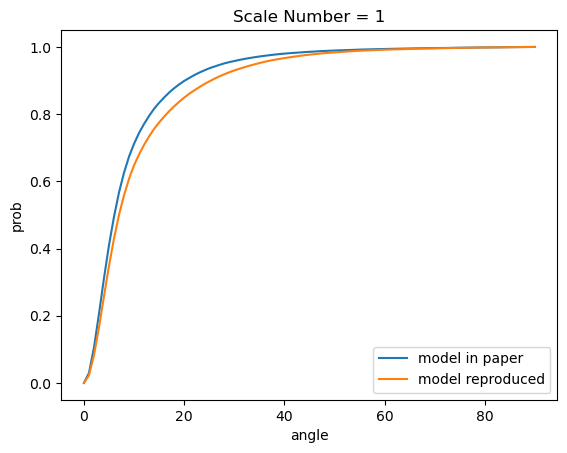

In [4]:
''' scale_number = 1 '''
# train model
nest.parameter_init()
nest.use_ResNet = True
nest.model_training()

# reproduced model
nest.est_normal(input_file_name)
_,angle_s1, prob_s1 = nest.evaluate(input_file_name)

# paper model
nest.use_ResNet = False
nest.use_paper_model = True
nest.est_normal(input_file_name)
_,angle_p, prob_p = nest.evaluate(input_file_name)

# figure plot
plt.plot(angle_p, prob_p, label = "model in paper")
plt.plot(angle_s1, prob_s1, label = "model reproduced")
plt.legend()
plt.xlabel('angle')
plt.ylabel('prob')
plt.title('Scale Number = 1')
plt.savefig(os.path.join(figure_path, 'rm_vs_pm_sn1.pdf'))
plt.show()

100%|██████████| 462/462 [00:54<00:00,  8.46it/s]


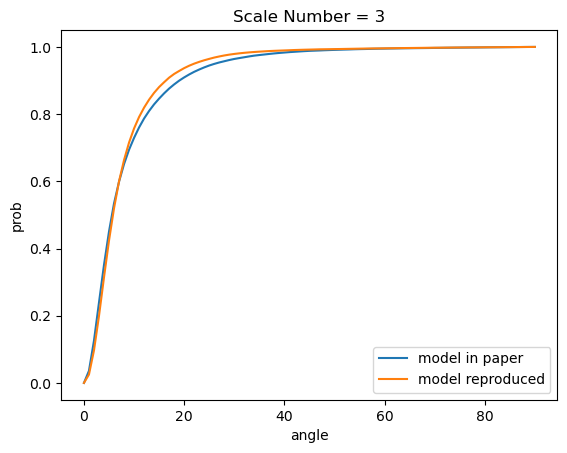

In [4]:
''' scale_number = 3 '''
# train model
nest.parameter_init()
nest.set_scale_number = 3
nest.use_ResNet = True
nest.model_training()

# reproduced model
nest.est_normal(input_file_name)
_,angle_s3, prob_s3 = nest.evaluate(input_file_name)

# paper model
nest.use_paper_model = True
nest.use_ResNet = False
nest.est_normal(input_file_name)
_,angle_p, prob_p = nest.evaluate(input_file_name)

# figure plot
plt.plot(angle_p, prob_p, label = "model in paper")
plt.plot(angle_s3, prob_s3, label = "model reproduced")
plt.legend()
plt.xlabel('angle')
plt.ylabel('prob')
plt.title('Scale Number = 3')
plt.savefig(os.path.join(figure_path, 'rm_vs_pm_sn3.pdf'))
plt.show()

creating dataset


100%|█████████████████████████████████████████| 391/391 [01:25<00:00,  4.57it/s]


(5, 33, 33)
  saving
-->done
loading the model
Creating optimizer
Training


100%|███████████| 391/391 [00:07<00:00, 52.48it/s, Bloss=0.00019, loss=0.000157]


training finished


100%|██████████| 462/462 [01:31<00:00,  5.03it/s]


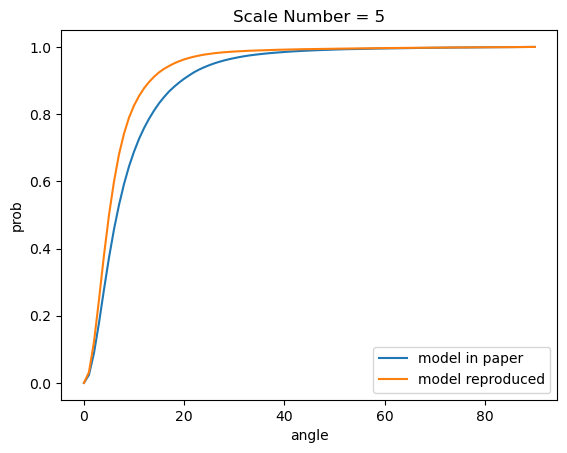

In [5]:
''' scale_number = 5 '''
# train model
nest.parameter_init()
nest.set_scale_number = 5
nest.use_ResNet = True
nest.model_training()

# reproduced model
nest.est_normal(input_file_name)
_,angle_s5, prob_s5 = nest.evaluate(input_file_name)

# paper model
nest.use_paper_model = True
nest.use_ResNet = False
nest.est_normal(input_file_name)
_,angle_p, prob_p = nest.evaluate(input_file_name)

# figure plot
plt.plot(angle_p, prob_p, label = "model in paper")
plt.plot(angle_s5, prob_s5, label = "model reproduced")
plt.legend()
plt.xlabel('angle')
plt.ylabel('prob')
plt.title('Scale Number = 5')
plt.savefig(os.path.join(figure_path, 'rm_vs_pm_sn5.pdf'))
plt.show()

In [ ]:
nest = normal_Est()
'''
Test variation of noise scale
'''
input_file_name = "dragon"

'''
varying noise scale = 0, 1%, 2%, 3%, 4%, 5%, 6%, 7%, 8%, 9%, 10%. 
'''

# noise scale set
NOISE = np.linspace(0,0.1,11)
# root mean square error set
RMS_p = []
RMS_r = []
# prob set of angle deviation less than 5 and 10 degree
PL5_p = []
PL10_p = []
PL5_r = []
PL10_r = []
for n in NOISE:
    # paper model
    nest.est_normal(input_file_name, noise_scale = n, scale_number = 1, use_paper_model = True)
    rms_p,angle_p,prob_p = nest.evaluate(input_file_name, noise_scale = n, scale_number = 1, use_paper_model = True)
    RMS_p.append(rms_p)
    PL5_p.append(prob_p[6])
    PL10_p.append(prob_p[11])
    # training model
    nest.est_normal(input_file_name, noise_scale = n, scale_number = 1)
    rms_r,angle_r,prob_r = nest.evaluate(input_file_name, noise_scale = n, scale_number = 1)
    RMS_r.append(rms_r)
    PL5_r.append(prob_r[6])
    PL10_r.append(prob_r[11])

# figure save path
figure_path = "evaluate_figures_plot"
if not os.path.exists(figure_path):
    os.makedirs(figure_path)
# plot figure 1
plt.plot(NOISE, RMS_p, label = "model in paper")
plt.plot(NOISE, RMS_r, label = "model reproduced")
plt.legend()
plt.ylabel('RMS (deg)')
plt.xlabel('Noise Scale (%)')
plt.title('RMS')
plt.savefig(os.path.join(figure_path, 'rnsv.pdf'))
plt.show()

# plot figure 2
plt.plot(NOISE, PL5_p, label = "model in paper")
plt.plot(NOISE, PL5_r, label = "model reproduced")
plt.legend()
plt.ylabel('Prob of angle deviation < 5 degree (%)')
plt.xlabel('Noise Scale (%)')
plt.title('5 degree deviation')
plt.ylim(0,1)
plt.savefig(os.path.join(figure_path, '5dd.pdf'))
plt.show()

# plot figure 3
plt.plot(NOISE, PL10_p, label = "model in paper")
plt.plot(NOISE, PL10_r, label = "model reproduced")
plt.legend()
plt.ylabel('Prob of angle deviation < 10 degree (%)')
plt.xlabel('Noise Scale (%)')
plt.ylim(0,1)
plt.title('10 degree deviation')
plt.savefig(os.path.join(figure_path, '10dd.pdf'))
plt.show()

In [ ]:
'''
Test variation of K
'''
input_file_name = "dragon"
    
K = [16,32,64,128,256]

# lines color
color = ['b','g','r','y','c']
# plot the figure
figure_path = "evaluate_figures_plot"
if not os.path.exists(figure_path):
    os.makedirs(figure_path)

''' scale_number = 1 '''
for i in range(len(K)):
    
    # paper model
    nest.est_normal(input_file_name, K = K[i], scale_number = 1, use_paper_model = True)
    _,angle_p, prob_p = nest.evaluate(input_file_name, K = K[i], scale_number = 1, use_paper_model = True)
    # training model
    nest.est_normal(input_file_name, K = K[i], scale_number = 1)
    _,angle_s1, prob_s1 = nest.evaluate(input_file_name, K = K[i], scale_number = 1)

    plt.plot(angle_p, prob_p, linestyle='--', color = color[i], label = "model in paper, K = " + str(K[i]))
    plt.plot(angle_s1, prob_s1, color = color[i], label = "model reproduced, K = " + str(K[i]))
plt.legend()
plt.xlabel('angle')
plt.ylabel('prob')
plt.title('Scale Number = 1')
plt.savefig(os.path.join(figure_path, 'rm_vs_pm_sn1.pdf'))
plt.show()
''' scale_number = 1 '''

''' scale_number = 3 '''
for i in range(len(K)):
    
    # paper model
    nest.est_normal(input_file_name, K = K[i], scale_number = 3, use_paper_model = True)
    _,angle_p, prob_p = nest.evaluate(input_file_name, K = K[i], scale_number = 3, use_paper_model = True)
    # training model
    nest.est_normal(input_file_name, K = K[i], scale_number = 3)
    _,angle_s3, prob_s3 = nest.evaluate(input_file_name, K = K[i], scale_number = 3)

    plt.plot(angle_p, prob_p, linestyle='--', color = color[i], label = "model in paper, K = " + str(K[i]))
    plt.plot(angle_s3, prob_s3, color = color[i], label = "model reproduced, K = " + str(K[i]))
plt.legend()
plt.xlabel('angle')
plt.ylabel('prob')
plt.title('Scale Number = 3')
plt.savefig(os.path.join(figure_path, 'rm_vs_pm_sn3.pdf'))
plt.show()
''' scale_number = 3 '''

''' scale_number = 5 '''

for i in range(len(K)):
    
    # paper model
    nest.est_normal(input_file_name, K = K[i], scale_number = 5, use_paper_model = True)
    _,angle_p, prob_p = nest.evaluate(input_file_name, K = K[i], scale_number = 5, use_paper_model = True)
    # training model
    nest.est_normal(input_file_name, K = K[i], scale_number = 5)
    _,angle_s5, prob_s5 = nest.evaluate(input_file_name, K = K[i], scale_number = 5)

    plt.plot(angle_p, prob_p, linestyle='--', color = color[i], label = "model in paper, K = " + str(K[i]))
    plt.plot(angle_s5, prob_s5, color = color[i], label = "model reproduced, K = " + str(K[i]))
plt.legend()
plt.xlabel('angle')
plt.ylabel('prob')
plt.title('Scale Number = 5')
plt.savefig(os.path.join(figure_path, 'rm_vs_pm_sn5.pdf'))
plt.show()
''' scale_number = 5 '''
